In [99]:
import pandas as pd # подключим библиотеку
import numpy as np
import matplotlib.pyplot as plt
# matplotlib.pyplot

# Загрузка данных и первичный осмотр

Импортируем датасет и выведем первые 5 строк.

In [100]:
#url = 'https://github.com/mirea-aie-2025/aie-course-meta/blob/main/seminars/S02/S02-hw-dataset.csv'
file='S02-hw-dataset.csv'
data = pd.read_csv(file, sep=',')
data.head(5)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [101]:
data.info() # информация о столбцах и типах

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [102]:
data.describe() # базовые описательные статистики

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


# Пропуски, дубликаты и базовый контроль качества

Посчитать долю пропусков в каждом столбце (например, через isna().mean() или аналог).

In [103]:
induk=data['age'].isna()
sum(induk) # пустые строки

2

Проверить наличие полностью дублирующих строк (через duplicated()).

In [104]:
duplicates = data.duplicated()
duplicates # Проверка наличия полностью дублирующих строк 

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

Найти и вывести «подозрительные» случаи, исходя из смысла датасета.

отрицательные значения в полях, где их не должно быть (количество, цена и т.п.);

In [105]:
induk=data['purchases']<0
sum(induk) # строки с отрицательным количеством покупок

1

In [49]:
induk=(data['purchases']>=1) & (data['revenue']==0) 
sum(induk) # нулевой доход при ненулевых количествах

1

возраст > 100

In [106]:
induk=data['age']>=100
sum(induk)

1

Обнаружены три строки с выделяющимеся значениями. В одной количесвто покупок отрицаетльно, во второй нулевой доход при нулевых покупках, в третьей возраст больше 100.

# Базовый EDA: группировки, агрегаты и частоты

In [107]:
data['country'].value_counts() # частота категориальой переменной (страны)

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [108]:
data['purchases'].value_counts() # частота категориальой переменной (кол-ва покупок)

purchases
 7     8
 6     8
 3     5
 5     4
 4     4
 2     3
 0     3
 9     2
-1     1
 8     1
 11    1
 1     1
Name: count, dtype: int64

In [109]:
group=data.groupby('country')
group['revenue'].median() # медиана дохода по странам

country
CN    1054.0
DE    1200.0
FR     619.5
RU     650.0
US     537.5
Name: revenue, dtype: float64

In [110]:
bins = [1, 18, 35, 50, 100]  
labels = ['children', 'midle', 'adults', 'elderly']
cuted = pd.cut(data['age'], bins=bins, right=False, labels=labels)
data['category_age']=cuted
data.head(5)

,user_id,age,country,purchases,revenue,category_age
0,1,25.0,FR,7,749,midle
1,2,24.0,RU,5,1115,midle
2,3,52.0,FR,7,399,elderly
3,4,31.0,RU,6,654,midle
4,5,NaN,DE,6,1296,NaN


In [111]:
group=data.groupby('category_age', observed=False)
median_revenue = group['revenue'].median() # медиана дохода по категориям возраста
median_revenue 

category_age
children    1488.0
midle        598.0
adults       828.0
elderly      546.0
Name: revenue, dtype: float64

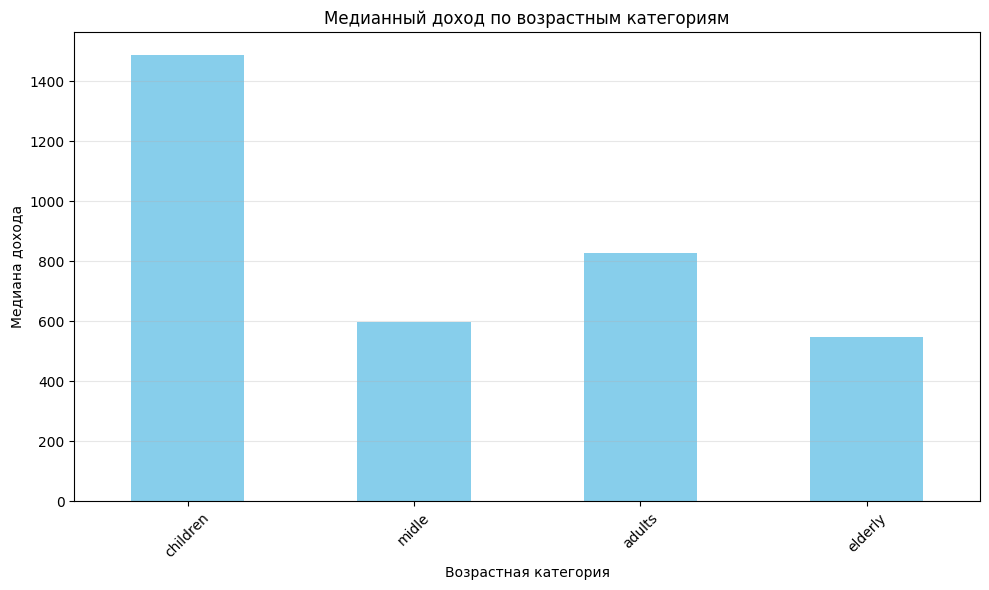

In [112]:
import matplotlib.pyplot as plt
median_revenue.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Медианный доход по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Медиана дохода')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

В целом со всех категорий в медиане примерно одинаковый доход, не учитывая возраста 1-18 лет. В нем содержится одна строка с завышенным доходом.

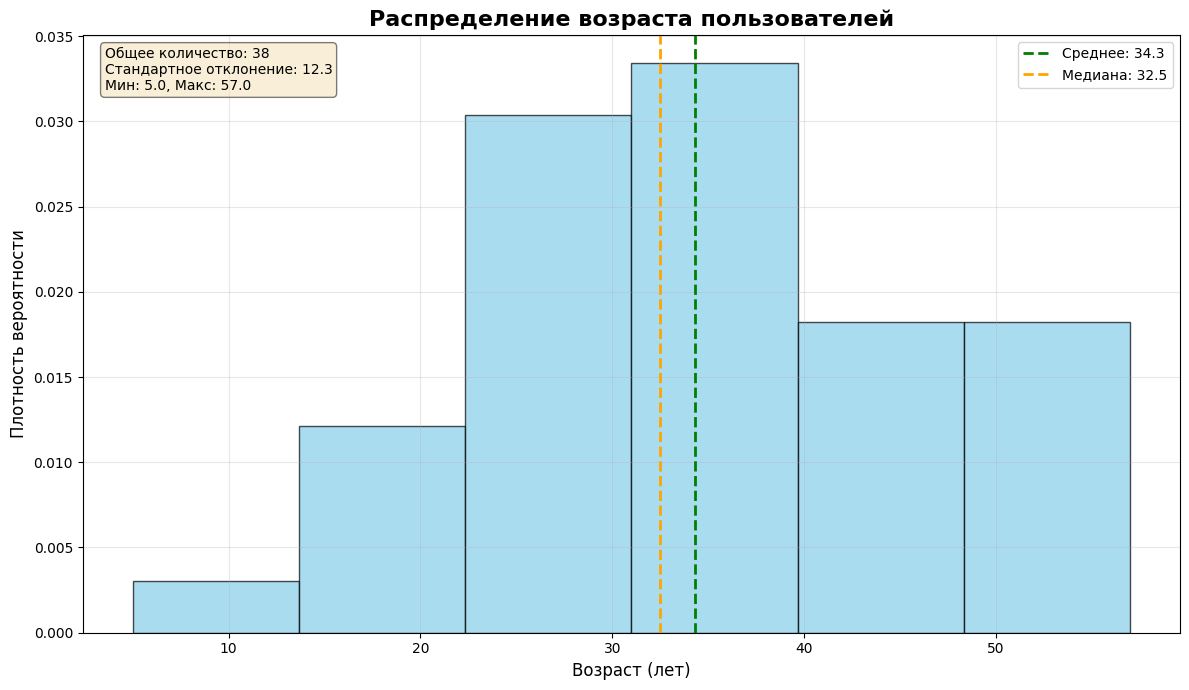

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('S02-hw-dataset.csv')
clean_data = data[(data['age'].notna()) & (data['age'] > 0) & (data['age'] < 100)].copy()

n = len(clean_data['age'])
bins_sturges = int(np.ceil(np.log2(n)) + 1)
bins_fd = int(np.ceil((clean_data['age'].max() - clean_data['age'].min()) / (3.5 * clean_data['age'].std() / (n ** (1/3)))))

optimal_bins = int(np.mean([bins_sturges, bins_fd]))
optimal_bins = max(5, min(optimal_bins, 20)) 

plt.figure(figsize=(12, 7))

n, bins, patches = plt.hist(
    clean_data['age'], 
    bins=optimal_bins, 
    color='skyblue', 
    edgecolor='black', 
    alpha=0.7,
    density=True  
)

# Настройка графика
plt.title('Распределение возраста пользователей', fontsize=16, fontweight='bold')
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.grid(True, alpha=0.3)

# среднее и медиана
mean_age = clean_data['age'].mean()
median_age = clean_data['age'].median()
plt.axvline(mean_age, color='green', linestyle='--', linewidth=2, label=f'Среднее: {mean_age:.1f}')
plt.axvline(median_age, color='orange', linestyle='--', linewidth=2, label=f'Медиана: {median_age:.1f}')

# аннотация
stats_text = f'Общее количество: {len(clean_data)}\nСтандартное отклонение: {clean_data["age"].std():.1f}\nМин: {clean_data["age"].min()}, Макс: {clean_data["age"].max()}'
plt.text(0.02, 0.98, stats_text, 
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.legend()
plt.tight_layout()

# Сохраняем график
plt.savefig('figures/histogram_age.png', dpi=300, bbox_inches='tight')

plt.show()

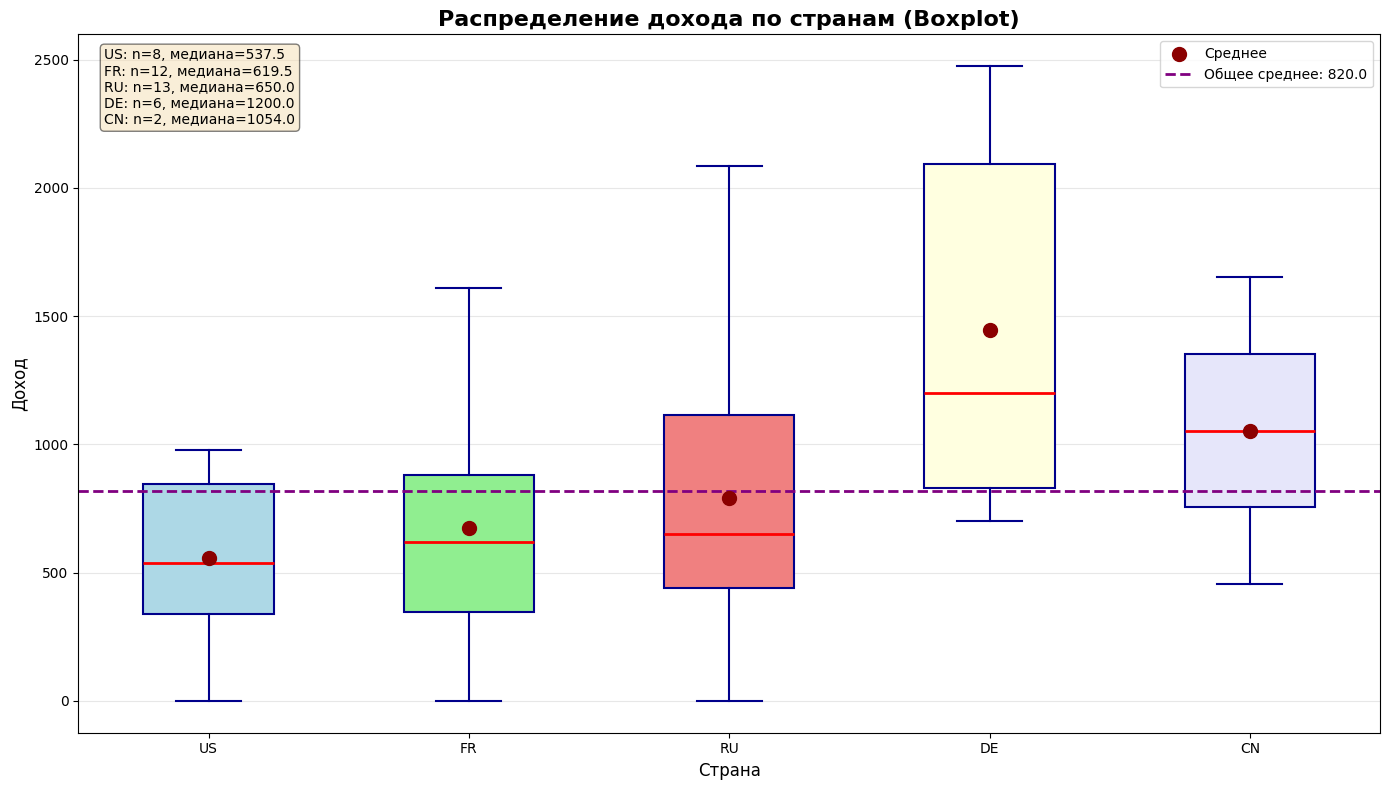

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('S02-hw-dataset.csv')

clean_data = data[(data['revenue'].notna()) & (data['revenue'] >= 0)].copy()

# Группировка
countries = ['US', 'FR', 'RU', 'DE', 'CN']
country_revenues = [clean_data[clean_data['country'] == country]['revenue'].values 
                    for country in countries if len(clean_data[clean_data['country'] == country]) > 0]

plt.figure(figsize=(14, 8))
boxplot = plt.boxplot(country_revenues, 
                      tick_labels=countries[:len(country_revenues)],
                      patch_artist=True,
                      medianprops=dict(color='red', linewidth=2),
                      boxprops=dict(facecolor='lightblue', color='darkblue', linewidth=1.5),
                      whiskerprops=dict(color='darkblue', linewidth=1.5),
                      capprops=dict(color='darkblue', linewidth=1.5),
                      flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, alpha=0.5))

colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lavender']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

means = [np.mean(revenues) for revenues in country_revenues]
for i, mean in enumerate(means):
    plt.scatter(i+1, mean, color='darkred', s=100, zorder=3, label='Среднее' if i == 0 else "")

plt.title('Распределение дохода по странам (Boxplot)', fontsize=16, fontweight='bold')
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

overall_mean = clean_data['revenue'].mean()
plt.axhline(y=overall_mean, color='purple', linestyle='--', linewidth=2, 
            label=f'Общее среднее: {overall_mean:.1f}')

stats_text = []
for i, country in enumerate(countries[:len(country_revenues)]):
    country_data = clean_data[clean_data['country'] == country]['revenue']
    stats_text.append(f'{country}: n={len(country_data)}, медиана={country_data.median():.1f}')

plt.text(0.02, 0.98, '\n'.join(stats_text),
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig('figures/boxplot_revenue.png', dpi=300, bbox_inches='tight')

plt.show()

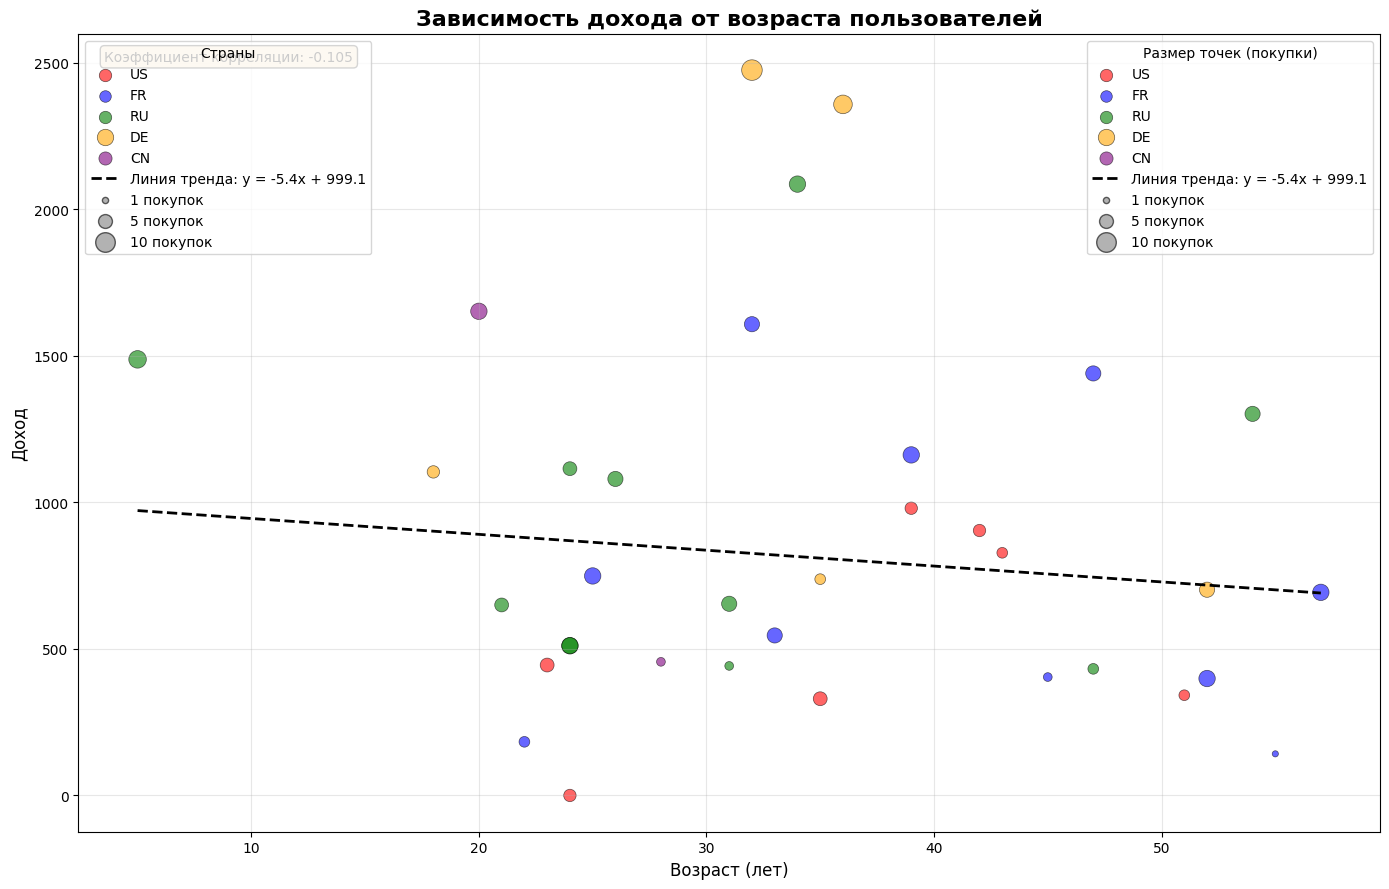

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('S02-hw-dataset.csv')

clean_data = data[
    (data['age'].notna()) & 
    (data['age'] > 0) & 
    (data['age'] < 100) &
    (data['revenue'].notna()) &
    (data['revenue'] >= 0) &
    (data['purchases'] >= 0)
].copy()

plt.figure(figsize=(14, 9))

country_colors = {
    'US': 'red',
    'FR': 'blue', 
    'RU': 'green',
    'DE': 'orange',
    'CN': 'purple'
}

for country, color in country_colors.items():
    country_data = clean_data[clean_data['country'] == country]
    if len(country_data) > 0:
        sizes = country_data['purchases'] * 20  # Масштабируем для наглядности
        
        plt.scatter(country_data['age'], 
                   country_data['revenue'], 
                   s=sizes,
                   c=color,
                   alpha=0.6,
                   edgecolors='black',
                   linewidth=0.5,
                   label=country)

plt.title('Зависимость дохода от возраста пользователей', fontsize=16, fontweight='bold')
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Доход', fontsize=12)
plt.grid(True, alpha=0.3)

x = clean_data['age']
y = clean_data['revenue']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
x_trend = np.array([x.min(), x.max()])
plt.plot(x_trend, p(x_trend), color='black', linestyle='--', linewidth=2, 
         label=f'Линия тренда: y = {z[0]:.1f}x + {z[1]:.1f}')

correlation = np.corrcoef(x, y)[0, 1]
plt.text(0.02, 0.98, f'Коэффициент корреляции: {correlation:.3f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

legend_sizes = [1, 5, 10]  
for size in legend_sizes:
    plt.scatter([], [], s=size*20, c='gray', alpha=0.6, edgecolors='black',
                label=f'{size} покупок' if size > 0 else f'{size} покупка')

legend1 = plt.legend(loc='upper left', title='Страны')
plt.gca().add_artist(legend1)

plt.legend(loc='upper right', title='Размер точек (покупки)')
plt.tight_layout()

plt.savefig('figures/scatter_age_revenue.png', dpi=300, bbox_inches='tight')

plt.show()